In [13]:
import json
with open('/home/s6amalia/mbert_wikiann_5epochs/mbert-wikiann-all-langs-history.json') as f:
    logs = json.load(f)
logs    

{'fr': [{'loss': 0.844,
   'learning_rate': 9.960000000000001e-05,
   'epoch': 0.02,
   'step': 50},
  {'loss': 0.4933, 'learning_rate': 9.92e-05, 'epoch': 0.04, 'step': 100},
  {'loss': 0.4961, 'learning_rate': 9.88e-05, 'epoch': 0.06, 'step': 150},
  {'loss': 0.4192, 'learning_rate': 9.84e-05, 'epoch': 0.08, 'step': 200},
  {'loss': 0.4114, 'learning_rate': 9.8e-05, 'epoch': 0.1, 'step': 250},
  {'loss': 0.4453, 'learning_rate': 9.76e-05, 'epoch': 0.12, 'step': 300},
  {'loss': 0.3503, 'learning_rate': 9.72e-05, 'epoch': 0.14, 'step': 350},
  {'loss': 0.3505,
   'learning_rate': 9.680000000000001e-05,
   'epoch': 0.16,
   'step': 400},
  {'loss': 0.358, 'learning_rate': 9.64e-05, 'epoch': 0.18, 'step': 450},
  {'loss': 0.4263, 'learning_rate': 9.6e-05, 'epoch': 0.2, 'step': 500},
  {'loss': 0.3701, 'learning_rate': 9.56e-05, 'epoch': 0.22, 'step': 550},
  {'loss': 0.3719, 'learning_rate': 9.52e-05, 'epoch': 0.24, 'step': 600},
  {'loss': 0.317, 'learning_rate': 9.48e-05, 'epoch': 0.2

In [15]:
import pandas as pd
df_logs = pd.DataFrame(logs['fr'])
df_logs

,loss,learning_rate,epoch,step,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.8440,9.960000e-05,0.02,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.4933,9.920000e-05,0.04,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.4961,9.880000e-05,0.06,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4192,9.840000e-05,0.08,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4114,9.800000e-05,0.10,250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0885,8.000000e-07,4.96,12400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,0.0535,4.000000e-07,4.98,12450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,0.0573,0.000000e+00,5.00,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,5.00,12500,0.314226,0.882746,0.894421,0.888545,0.94676,10.5936,943.969,117.996,NaN,NaN,NaN,NaN,NaN


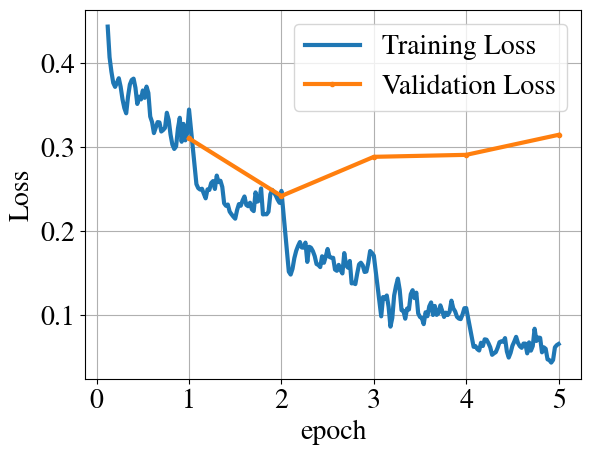

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Provide the font's path manually
font_path = '/fonts/Times-Roman Regular.ttf'  # Your font path goes here
fm.fontManager.addfont(font_path)
font_path = '/fonts/Times-Roman Regular.ttf'
# Create a font property object
font_prop = fm.FontProperties(fname=font_path)

# Set the font as the default font for all text elements in plots
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 20



df_logs['smoothed_loss'] = df_logs['loss'][2:].rolling(window=4).mean()
ax=df_logs[['smoothed_loss','epoch']].dropna().plot(x='epoch',y='smoothed_loss', linewidth=3.0)
df_logs[['eval_loss','epoch']].dropna().plot(ax=ax,x='epoch',y='eval_loss',style='.-',linewidth=3.0)
ax.set_ylabel('Loss')

# Set the legend labels
ax.legend(['Training Loss', 'Validation Loss'])
xticks = np.linspace(start=df_logs['epoch'].min(), stop=df_logs['epoch'].max(), num=6)
ax.set_xticks(xticks.astype(int))
ax.grid(True)
plt.savefig('/loss_2vs6_ep.pdf',bbox_inches='tight')
